Instituto Federal de Educação, Ciência e Tecnologia da Paraíba
Campus Campina Grande
Disciplina: Estatística Aplicada à Computação/Telemática
Lista 12
Professor: Paulo Ribeir

1. O conjunto de dados dados1.csv possue notas de 100 alunos do curso de Economia da FEA-USP, em prova da
disciplina Introdução à Probabilidade e à Estatística, 1999. Construe uma distribuição de frequencias e um
gráfico para essas notas

In [57]:
import pandas as pd
import numpy as np
df = pd.read_csv('dados1 (3).csv', sep=';', decimal=',')
df

,"3,5","4,0","5,5","6,0","5,0","5,5.1","5,0.1","5,5.2","4,0.1","10,0"
0,6.5,9.5,4.0,7.0,7.5,3.0,4.5,5.0,2.5,6.0
1,5.0,6.5,3.5,4.5,8.5,4.0,8.0,7.0,6.0,7.5
2,8.5,6.0,9.0,6.0,6.5,7.5,5.5,6.5,8.0,8.5
3,4.5,7.5,8.0,3.0,4.0,8.0,4.5,5.5,6.0,6.0
4,7.5,3.5,3.0,7.0,1.5,4.5,10.0,5.5,2.5,10.0
5,4.0,6.5,7.5,5.5,7.0,7.5,6.0,6.5,6.5,5.5
6,6.5,5.0,5.5,7.5,8.0,6.5,5.0,7.0,6.0,5.5
7,3.0,5.0,3.5,6.0,6.5,6.0,8.0,5.5,7.5,6.0
8,2.5,7.5,9.0,6.0,6.5,3.5,4.5,7.0,5.0,5.0


In [58]:
import pandas as pd
import numpy as np
def dist_frequencia_classes(x, nc='auto'):
    #função histogram do numpy para calcular as freq. absolutas e intervalos das classes
    fa,classes= np.histogram(x, bins=nc) 
    fa = fa.astype(int)#pra transformar em int 
    #freq. relativas = freq. absolutas/no. de dados do conjunto x 100 pra forma percentual
    fr = np.around(fa/fa.sum()*100,decimals=2) #duas casas decimais
    #freq. cumulativa usando a função cumsum do numpy
    #frnorm = np.around(fi/(fi.sum() * np.diff(classes)),decimals=2)
    fc = np.cumsum(fa).astype(int) #pra transformar em int 
    # o laço a seguir serve unicamente para escrever os intervalos das classes como strings
    # dentro do vetor 'classe_str'
    classe_str = []
    for i in range(len(classes)):
        if i<=len(classes)-2:
            classe_str.append('{:2.2f} |-- {:2.2f}' .format(classes[i],classes[i+1]))
        else:
            break        
    # a função retorna um dataframe, cujas linhas serão indexadas pelo vetor 'classe_str', e as 
    #colunas terão as frequências absoluta (inteira), relativa (float) e cumulativa (int) calculadas 
    return pd.DataFrame({'Classes':classe_str, 
                         'fi': fa,
                         'fr': fr,
                         #'frnorm':frnorm,
                         'Fc': fc
                        }).set_index('Classes') # transforma a coluna 'Classes' nos indices das linhas 


In [59]:
import pandas as pd
import numpy as np
tbf=dist_frequencia_classes(df, nc='auto')
tbf

,fi,fr,Fc
Classes,,,
1.50 |-- 2.56,4,4.44,4
2.56 |-- 3.62,8,8.89,12
3.62 |-- 4.69,10,11.11,22
4.69 |-- 5.75,15,16.67,37
5.75 |-- 6.81,23,25.56,60
6.81 |-- 7.88,16,17.78,76
7.88 |-- 8.94,9,10.00,85
8.94 |-- 10.00,5,5.56,90


<AxesSubplot:title={'center':'TFB'}, xlabel='Classes'>

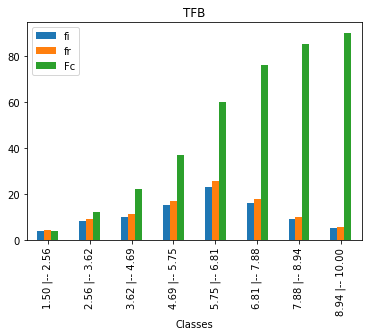

In [60]:
import pandas as pd
import numpy as np

%matplotlib inline
tbf.plot.bar(title='TFB')

2. O conjunto de dados dados2.csv mostra os dados brutos de uma amostra de 27 imóveis anunciados para venda
nos anúncios de um site especializado. Nesse exemplo, cada observação é um imóvel e cada variável é um
atributo dos imóveis (bairro, tipo, número de quartos, preço).
Com base nesses dados:
(a) classifique cada variável do conjunto;
(b) monte uma distribuição de frequência para cada uma das variáveis;
(c) crie um gráfico representando cada uam das variáveis disponíveis.

In [61]:
import pandas as pd
import numpy as np
df1 = pd.read_csv('dados2.csv', sep=';', decimal=',')
df1

,Bairro,Tipo,N de quartos,Preço (mil)
0,Barra,Apto.,2,165
1,Barra,Apto.,3,240
2,Barra,Cobt.,3,158
3,Barra,Sala,0,90
4,Botafogo,Apto.,2,270
5,Catete,Apto.,1,250
6,Centro,Sala,1,110
7,Copacabana,Apto.,2,210
8,Copacabana,Apto.,2,200
9,Copacabana,Apto.,3,280


A)
Bairro       : qualitativa nominal	
Tipo         : qualitativa nominal
N de quartos : quantitativa discreta
Preço (mil)  : quantitativa discreta

In [70]:
import pandas as pd
import numpy as np
"B) monte uma distribuição de frequência para cada uma das variáveis;"
"Bairro"
dfbairro=pd.DataFrame({'fa':df1['Bairro'].value_counts(),"fr": np.around(df1['Bairro'].value_counts()/df1['Bairro'].value_counts().sum()*100,decimals=2)})
dfbairro

,fa,fr
Barra,4,14.81
Copacabana,3,11.11
Tijuca,3,11.11
Laranjeiras,2,7.41
Leblon,2,7.41
Flamengo,2,7.41
Gávea,1,3.70
Recreio,1,3.70
Maracanã,1,3.70
Lagoa,1,3.70


In [76]:
import pandas as pd
import numpy as np
dftipoo=pd.DataFrame({'fa':df1['Tipo'].value_counts(),"fr": np.around(df1['Tipo'].value_counts()/df1['Tipo'].value_counts().sum()*100,decimals=2)})
dftipoo

,fa,fr
Apto.,20,74.07
Cobt.,3,11.11
Sala,2,7.41
Casa,2,7.41


In [77]:
import pandas as pd
import numpy as np
dftipoo=pd.DataFrame({'fa':df1['N de quartos'].value_counts(),"fr": np.around(df1['N de quartos'].value_counts()/df1['N de quartos'].value_counts().sum()*100,decimals=2)})
dftipoo

,fa,fr
2,9,33.33
3,8,29.63
>=4,6,22.22
1,3,11.11
0,1,3.70


In [78]:
import pandas as pd
import numpy as np
dftipoo=pd.DataFrame({'fa':df1['Preço (mil)'].value_counts(),"fr": np.around(df1['Preço (mil)'].value_counts()/df1['Preço (mil)'].value_counts().sum()*100,decimals=2)})
dftipoo

,fa,fr
210,2,7.41
200,2,7.41
290,2,7.41
320,1,3.70
220,1,3.70
219,1,3.70
90,1,3.70
254,1,3.70
280,1,3.70
340,1,3.70


<AxesSubplot:title={'center':'Bairro'}, ylabel='Bairro'>

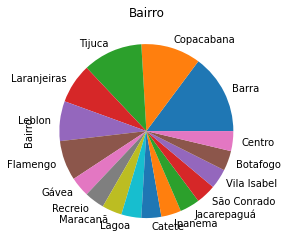

In [80]:
import pandas as pd
import numpy as np

%matplotlib inline
df1['Bairro'].value_counts().plot.pie(title='Bairro')

<AxesSubplot:title={'center':'Tipo'}, ylabel='Tipo'>

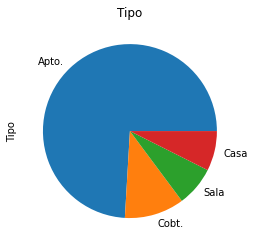

In [81]:
import pandas as pd
import numpy as np

%matplotlib inline
df1['Tipo'].value_counts().plot.pie(title='Tipo')

<AxesSubplot:title={'center':'N de quartos'}, ylabel='N de quartos'>

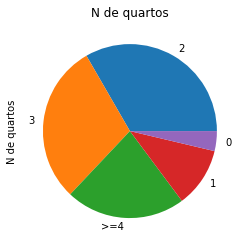

In [82]:
import pandas as pd
import numpy as np

%matplotlib inline
df1['N de quartos'].value_counts().plot.pie(title='N de quartos')

<AxesSubplot:title={'center':'Preço (mil)'}, ylabel='Preço (mil)'>

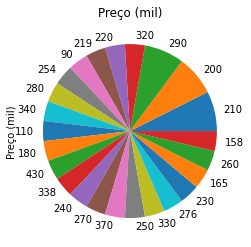

In [83]:
import pandas as pd
import numpy as np

%matplotlib inline
df1['Preço (mil)'].value_counts().plot.pie(title='Preço (mil)')